#Introduction to Logistic Regression

Logistic Regression is one of the basic and popular algorithms to solve a classification problem. It is named 'Logistic Regression' because its underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function (sigmoid function) that is used in this method of classification.

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

# Binary (Binomial) Logistic Regression model

In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.
We will implement the above concept of binomial logistic regression in Python. For this purpose, first, we need to import the necessary libraries as follows

The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0. It allows us to model a relationship between multiple predictor variables and a binary/binomial target variable. In case of logistic regression, the linear function is basically used as an input to another function.

We will implement the above concept of binomial logistic regression in Python. For this purpose, first, we need to import the necessary libraries as follows


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

We will test our algorithm with `make_blobs` from `sklearn datasets`

In [ ]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=.8, shuffle=True, random_state=0)

In [ ]:
X.shape

(400, 2)

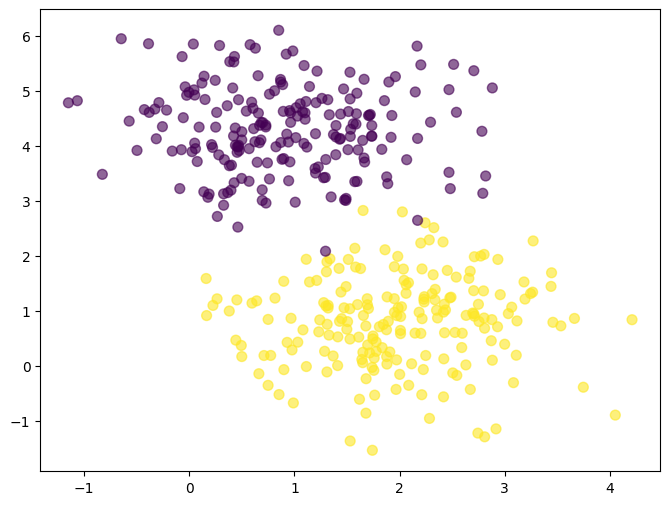

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.6)
plt.show()

## Cost (Loss) function [Cross Entropy function]

The formula gives the cost function for the logistic regression:
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{i}\ln(h_{\theta}(x^{i}))+(1-y^{i})\ln(1-h_{\theta}(x^{i}))]
$$

Where hypothesis $h_{\theta}$ is the sigmoid function.

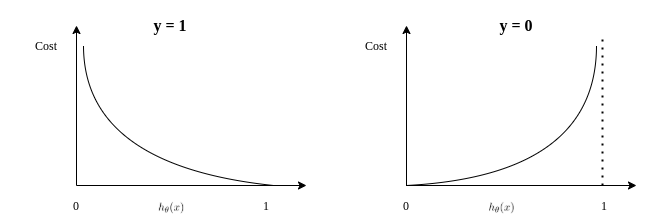

Cross Entropy Logistic Regression Cost (Loss) Function demonstration

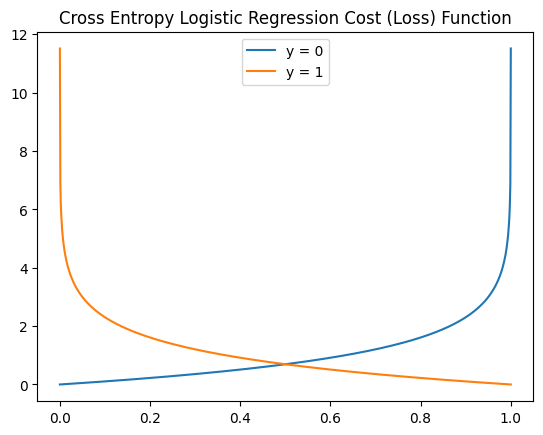

In [ ]:
# Logistic Regression Cost (Loss) Function
def cost(h, y):
   return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

n = 1000
hh = np.linspace(1e-5, 0.99999, n)
yy_0 = np.zeros(n)
yy_1 = np.ones(n)
cc0 = []
cc1 = []
cc_sum=[]
for i in range(n):
  ll0 = cost(hh[i], yy_0[i])
  ll1 = cost(hh[i], yy_1[i])
  cc0.append(ll0)
  cc1.append(ll1)
  cc_sum.append(ll0+ll1)

plt.plot(hh, cc0, label='y = 0')
plt.plot(hh, cc1, label='y = 1')
plt.title('Cross Entropy Logistic Regression Cost (Loss) Function')
plt.legend()
plt.show()

#plt.plot(hh,cc_sum)
#plt.title('Final Cross Entropy sum')
#plt.show()


## Gradient Descent
Gradient descent is an optimization algorithm that is responsible for the learning of best-fitting parameters. By differentiating the cost function, we get the gradient descent expression:

$$\frac{\partial J(\theta )}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

The vectorised form of the gradient descent expression, which we will be using in our code is:

$$∇J(\theta)=X^T (h_{\theta}(x) - y) $$

## Minimizing the Cost with Gradient Descent

Assume we have a total of $n$ features. In this case, we have $n$ parameters for the $\theta$ vector. To minimize our cost function, we need to run the gradient descent on each parameter $\theta_j$:

$$\theta_j \gets \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta), $$

where $\alpha$ is the learning rate and $\theta$ are here represented by the Weight vector ($w$).


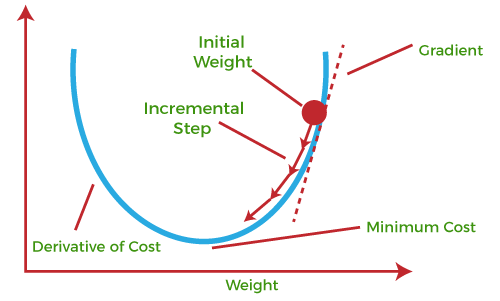

## Define functions

Next we will define sigmoid function, loss function and gradient descent

In [ ]:
# adiciona uma coluna de '1' correspondente ao weight(0)
def addOnes(X):
   intercept = np.ones((X.shape[0], 1))
   return np.concatenate((intercept, X), axis=1)

# outra maneira de adicionar uma coluna de '1' correspondente ao weight(0)
def addOnes_(X):
    return np.c_[np.ones(X.shape[0]),X]

# função logística (sigmoid)
def sigmoid(z):
   return 1 / (1 + np.exp(-z))

# função perda (loss), também chamda de função custo (cost) ou função erro (error)
# log-likelihood function (LLF) --> maximum likelihood estimation
def loss(h, y):
   return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

# treinamento do modelo
def fit(X, y, eta, num_iter):
    # initialize the weights with zeros
    w = np.zeros(X.shape[1])
    # initialize cost vector with empty list
    cost_ = []

    for i in range(num_iter):
        # multiplicação da matriz X pelo vetor peso (w)
        z = np.dot(X, w)
        # função logística (sigmoid) --> 0 < h < 1
        h = sigmoid(z)
        # função custo (perda)
        loss_ = loss(h, y)
        # salvo valor da função custo
        cost_.append(loss_)
        # derivada da função custo --> gradiente(custo) --> Função Gradiente Descendente
        gradient = np.dot(X.T, (h - y)) / y.size
        # atualização dos pesos (gradiente descendente) ==> w = w - eta * gradiente
        w -= eta * gradient

        if(i % 100 == 0):
            print(f'loss[{i}]: {loss_}')
            #cost_.append(loss_)

    return cost_, w

# predict the output probabilities
def predict_prob(X, w):
   return sigmoid(np.dot(X, w))

def prediction(X, w):
   return predict_prob(X, w).round()

# medição da acurácia das predições
def Accuracy(y, y_hat):
    match = 0
    n = y.shape[0]
    for i in range(n):
        if(y[i] == y_hat[i]):
            match += 1

    accuracy = match / n
    return accuracy

In [ ]:
# adiciona uma coluna de '1' correspondente ao weight(0)
X_ones = addOnes_(X)
# learning rate --> hyperparameter
eta = 0.01
# number of iterations (epochs)
n_epochs = 4001
# Fit net --> retorna a função custo em forma de vetor e o vetor peso final otimizado
fCusto, w = fit(X_ones, y, eta, n_epochs)

loss[0]: 0.6931471805599452
loss[100]: 0.38935812410239007
loss[200]: 0.29322992381066426
loss[300]: 0.2420899508632486
loss[400]: 0.21033760620911146
loss[500]: 0.18860347984149733
loss[600]: 0.1727081991219108
loss[700]: 0.16051827826065362
loss[800]: 0.1508320474456897
loss[900]: 0.14292061059852731
loss[1000]: 0.1363156453553646
loss[1100]: 0.1307021192443937
loss[1200]: 0.1258600398279571
loss[1300]: 0.12163093960571367
loss[1400]: 0.1178976437572019
loss[1500]: 0.11457155279408102
loss[1600]: 0.11158436862092133
loss[1700]: 0.10888254909187185
loss[1800]: 0.10642349377270921
loss[1900]: 0.10417286004031619
loss[2000]: 0.10210263607317455
loss[2100]: 0.10018973216572812
loss[2200]: 0.09841493418755212
loss[2300]: 0.09676211467578803
loss[2400]: 0.09521763022677618
loss[2500]: 0.09376985561730464
loss[2600]: 0.09240881964310362
loss[2700]: 0.0911259175725915
loss[2800]: 0.08991368197092552
loss[2900]: 0.08876559846500344
loss[3000]: 0.08767595644873176
loss[3100]: 0.086639727200274

In [ ]:
print('Valor final da Função Custo (Perda): ', fCusto[-1])

Valor final da Função Custo (Perda):  0.07912076486359597


In [ ]:
# o objetivo é encontrar os pesos otimizados (weights) das entradas através do treinamento do modelo
print('Os pesos do modelo treinado:', w)

Os pesos do modelo treinado: [ 1.38969642  1.97865402 -1.8697276 ]


In [ ]:
# Compute the prediction output value y (y_hat)
# Utilizando os pesos do modelo treinado vamos fazer as predições (y_hat = ŷ)
y_hat = prediction(X_ones, w)
#print('Matrix y: \n', y)
#print('Matrix prediction y_hat: \n', y_hat.astype('int'))

In [ ]:
# imprimindo a quantidade dos erros de predição
print('Mismatch prediction: ', (y!=y_hat).sum())

Mismatch prediction:  10


In [ ]:
# Acurácia --> métrica de eficiência do algoritmo
acc = Accuracy(y, y_hat)
#print('Acurácia: ', acc)
print("Accuracy: {:.1f}%".format(acc * 100))
accuracy = (y_hat == y).mean()
print("Accuracy (another way): {:.1f}%".format(accuracy * 100))

Accuracy: 97.5%
Accuracy (another way): 97.5%


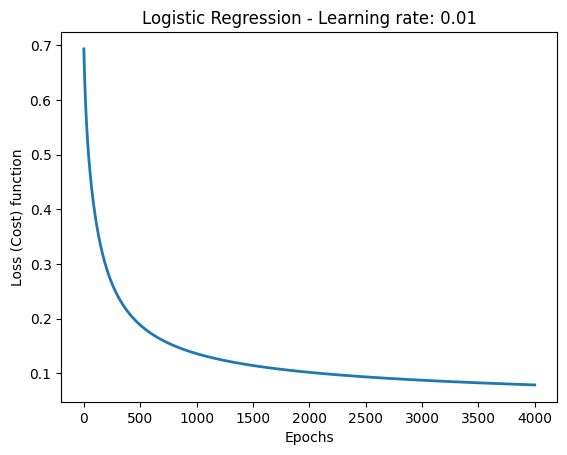

In [ ]:
#plt.plot(range(1, len(fCusto) + 1), fCusto, marker='.')
#plt.plot(range(1, len(fCusto) + 1), fCusto, linewidth=2)
plt.plot(fCusto, linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss (Cost) function')
plt.title('Logistic Regression - Learning rate: ' + str(eta))
plt.show()

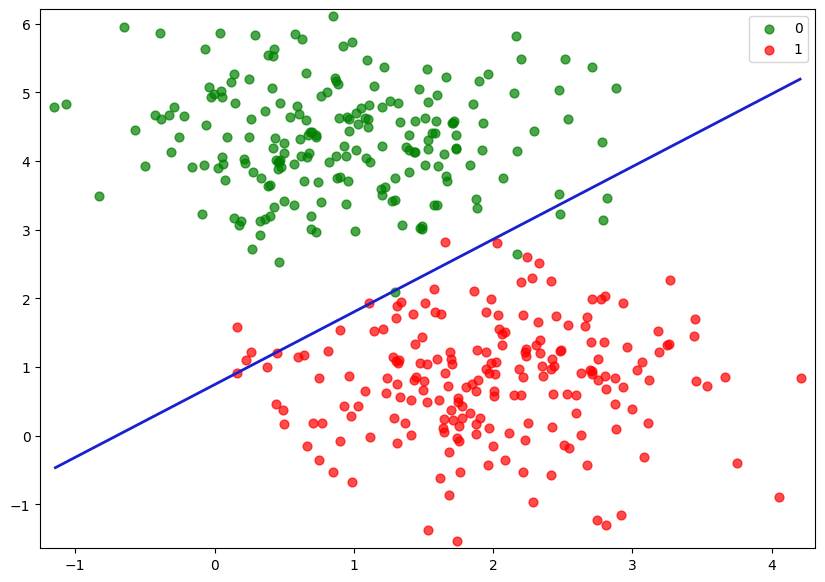

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0', alpha=.7, s=40)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1', alpha=.7, s=40)
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
# adiciona uma coluna de '1' correspondente ao weight(0)
grid_ones = addOnes_(grid)
# grid_ones = np.c_[np.ones(grid.shape[0]),grid]

# predict the output probabilities with sigmoid function
probs = predict_prob(grid_ones, w).reshape(xx1.shape)
# plota a margem limítrofe de classificação
plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors='#1820d0')
plt.xlim(x1_min - .1, x1_max + .1)
plt.ylim(x2_min - .1, x2_max + .1)
plt.show()


# Referências

[1] https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

[2] http://neuralnetworksanddeeplearning.com/chap3.html

[3] https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

[4] https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

[5] https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67